In [1]:
import os
os.chdir('../') # insures use of models folder as python module 
# Any figures saved or data pickled in the current working 
# directly will be saved up one folder from here.
import pybamm
import models
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

In [2]:
model = models.Cornish2021()

In [3]:
experiment = pybamm.Experiment(['Charge at 0.0211 A for 11.85 hours'])

sim = pybamm.Simulation(
    model=model,
    experiment=experiment,
    solver=pybamm.CasadiSolver(
        atol=1e-6,
        rtol=1e-6,
        #dt_max = .01,
        #extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
    ),
)

In [4]:
sim.solve()

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed


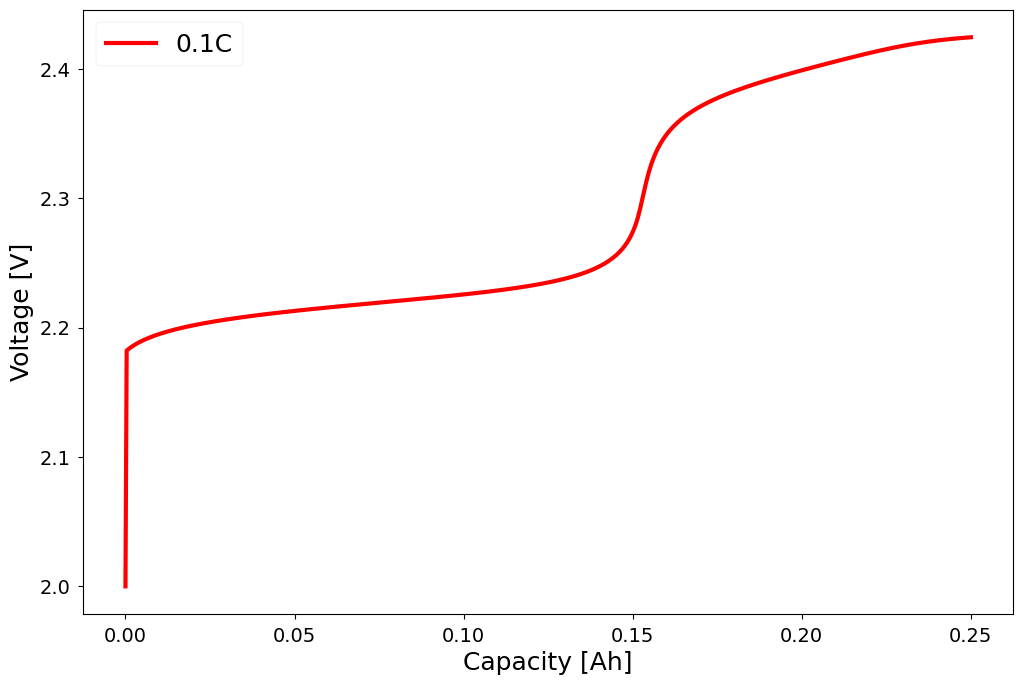

In [5]:
capacity = sim.solution['Capacity [Ah]'].entries
V = sim.solution["Terminal voltage [V]"].entries
plt.plot(capacity, V)

plt.legend(["0.1C",])
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]');